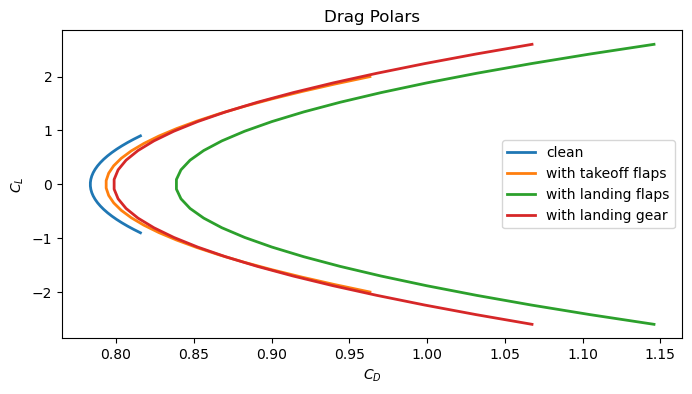

In [ ]:
# EAE 130A - Aircraft Performance and Design
# Assignment 3 - Drag Polar
# Group 9
# 13 February 2025


import numpy as math 
import matplotlib.pyplot as plt

## FROM WEIGHT ESTIMATION CODE ##
lift2drag_ratio_max = 13 # around 13 for design 2 using the b^2/s_wet vs. L/D ratio # float(input("Enter the MAX L/D ratio: "))

lift2drag_ratio = 0.94 * lift2drag_ratio_max

Range = 600  # nmi - from RFP "range is the distance flown - use for cruise" lec03
Endurance = 30 / 60  # 30 min -> 0.5 hr from RFP "endurance is the time flown - use for loiter" lec03
c = 0.595 # float(input("Enter the specific fuel consumption value 'c' [1/s]: "))  # Updated units for clarity
velocity = 250 * 1.69  # knots to ft/s - maximum operational speed - from RFP

# Cruising
W5_W4 = math.exp((-Range * c) / (velocity * lift2drag_ratio))  # weight fraction during cruising
# Loitering
W7_W6 = math.exp((-Endurance * c) / (lift2drag_ratio))  # weight fraction during loitering

# For final weight fraction calculations, we are using the typical weight fractions
# Warmup (0.996), Taxi (0.995), Takeoff (0.996), Climb (0.998), Descent (0.999), and Landing (0.998)

W1_W0 = 0.996  # weight fraction for warm-up
W2_W1 = 0.995  # weight fraction for taxi
W3_W2 = 0.996  # weight fraction for takeoff
W4_W3 = 0.998  # weight fraction for climb
               # calculated weight fraction for cruising
W6_W5 = 0.999  # weight fraction for descent
               # calculated weight fraction for loitering
W8_W7 = 0.999  # weight fraction for descent (2)
W9_W8 = 0.998  # weight fraction for landing

W9_W0 = W9_W8 * W8_W7 * W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0
##

# WING LOADING - Metabook pg. 31
S_ref = float(input("Enter the reference wing area (ft^2): "))
S_wet = float(input("Enter the reference wing wet area (ft^2): "))
W_0 = float(input("Enter the takeoff gross weight (lbs): "))

# Phase 1 - Warm-Up - in reference to the takeoff weight
W_1 = W1_W0 * W_0
wing_loading_warm_up = (W_1 / S_ref) * (W1_W0)

# Phase 2 - Taxing 
W_2 = W2_W1 * W_1
wing_loading_taxi = (W_2 / S_ref) * (W2_W1 * W1_W0)

# Phase 3 - Takeoff 
W_3 = W3_W2 * W_2
wing_loading_takeoff = (W_3 / S_ref) * (W3_W2 * W2_W1 * W1_W0)

# Phase 4 - Climb 
W_4 = W4_W3 * W_3
wing_loading_climb = (W_4 / S_ref) * (W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 5 - Cruising 
W_5 = W5_W4 * W_4
wing_loading_cruising = (W_5 / S_ref) * (W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 6 - Descent 
W_6 = W6_W5 * W_5
wing_loading_descent1 = (W_6 / S_ref) * (W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 7 - Loitering 
W_7 = W7_W6 * W_6
wing_loading_loitering = (W_7 / S_ref) * (W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 8 - Descent 
W_8 = W8_W7 * W_7
wing_loading_descent2 = (W_8 / S_ref) * (W8_W7 * W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# Phase 9 - Landing 
W_9 = W9_W8 * W_8
wing_loading_landing = (W_9 / S_ref) * (W9_W8 * W8_W7 * W7_W6 * W6_W5 * W5_W4 * W4_W3 * W3_W2 * W2_W1 * W1_W0)

# DRAG POLAR
# From Metabook pg. 35
# From Figure 3.6 of Raymer's text, wetted area to reference wing area has been estimated to be 4 (Cessna Skyline RG)

S_wet_S_ref =  S_wet / S_ref # 4 - from Raymer's text
c_f = 0.0055 # figure 4.4 on Metabook - "light aircraft - single engine"

parasite_drag_coeff = c_f * S_wet_S_ref

AR = 10 # using typical aspect ratio for estimations - NEED ACTUAL VALUE


cL_clean = math.linspace(-0.9, 0.9, 30)
cL_takeoff = math.linspace(-2, 2, 30)
cL_landing = math.linspace(-2.6, 2.6, 30)

eff_clean = float(input("Enter the Oswald efficiency for clean configuration (0.80 ~ 0.85): "))
eff_takeoff = float(input("Enter the Oswald efficiency for takeoff flaps configuration (0.75 ~ 0.80): "))
eff_landing_flaps = float(input("Enter the Oswald efficiency for landing flaps configuration (0.70 ~ 0.75): "))

delta_cD0_takeoff = float(input("Enter the change in parasite drag coefficient (C_D0) for takeoff flaps (0.010 ~ 0.020): "))
delta_cD0_landing_flaps = float(input("Enter the change in parasite drag coefficient (C_D0) for landing flaps (0.055 ~ 0.075): "))
delta_cD0_landing_gear = float(input("Enter the change in parasite drag coefficient (C_D0) for landing gear (0.015 ~ 0.025): "))

# Clean drag polar
cD_clean = parasite_drag_coeff + (1 / (math.pi * eff_clean * AR)) * (cL_clean ** 2)

# Takeoff flaps drag polar
cD_takeoff = (parasite_drag_coeff + delta_cD0_takeoff) + (1 / (math.pi * eff_takeoff * AR)) * (cL_takeoff ** 2)

# Landing flaps drag polar
cD_landing_flaps = (parasite_drag_coeff + delta_cD0_landing_flaps) + (1 / (math.pi * eff_landing_flaps * AR)) * (cL_landing ** 2)

# Landing gear drag polar
cD_landing_gear = (parasite_drag_coeff + delta_cD0_landing_gear) + (1 / (math.pi * eff_clean * AR)) * (cL_landing ** 2) # Just used the clean efficiency here 
# (DELETE LATER: looks like that's what the sample code did as well)

plt.figure(figsize=(8,4))
plt.title('Drag Polars')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.plot(cD_clean, cL_clean, label='clean', linestyle='-', linewidth=2)
plt.plot(cD_takeoff, cL_takeoff, label='with takeoff flaps', linestyle='-', linewidth=2)
plt.plot(cD_landing_flaps, cL_landing, label='with landing flaps', linestyle='-', linewidth=2)
plt.plot(cD_landing_gear, cL_landing, label='with landing gear', linestyle='-', linewidth=2)
plt.legend(loc='best')
plt.show()

# From Roskam pg. 122
# Power loading : W/P
# Power-to-weight ratio : P/W
# eta_p : propeller efficiency - thrust power produced by the propeller 
# (thrust * velocity) divided by the actual power provided by the engine. 

#eta_p = float(input("Enter the efficiency of the propeller: "))
#V = float(input("Enter the velocity (ft/s): "))
#power_weight_ratio = thurst_weight_ratio / (550 * eta_p / V)
